# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
#Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, r

In [13]:
df['AdjustedCompensation'].value_counts(dropna=False)

NaN          22051
100000.00       60
120000.00       59
150000.00       58
71749.56        47
             ...  
312.40           1
20280.00         1
33110.86         1
8222.72          1
107079.44        1
Name: AdjustedCompensation, Length: 1628, dtype: int64

In [14]:
df['FormalEducation'].value_counts(dropna=False)

NaN                                                                  8252
Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [110]:
#Your code here
import flatiron_stats as fs
import seaborn as sns
import numpy as np
import scipy.stats as stats
col1 = 'FormalEducation'
col2 = 'AdjustedCompensation'
degree1 = "Bachelor's degree"
degree2 = "Master's degree"
degree3 = "Doctoral degree"

df_1 = df[(df[col1]==degree1) & (~df[col2].isna())][col2]
df_2 = df[(df[col1]==degree2) & (~df[col2].isna())][col2]
df_3 = df[(df[col1]==degree3) & (~df[col2].isna())][col2]

In [70]:
df_1

8         64184.800
9         20882.400
11         1483.900
21        20000.000
25        10858.848
            ...    
26031     39050.000
26072     31878.000
26101      3336.000
26185     50000.000
26195    100449.384
Name: AdjustedCompensation, Length: 1107, dtype: float64

In [103]:
def describe_data(data, degree):
    mean = np.mean(data)
    median = np.median(data)
    sd = np.std(data)
    _min = np.min(data)
    _max = np.max(data)
    
    print(degree, ' Analysis')
    print('-'*len(degree+' Analysis'))
    print(f'mean: {mean}')
    print(f'median: {median}')
    print(f'sd: {sd}')
    print(f'size: {len(data)}')
    print(f'min: {_min}')
    print(f'max: {_max}')
    
        

In [118]:
def compare_two_degrees(data1, data2, degree1, degree2):
    describe_data(data1, degree1)
    print()
    describe_data(data2, degree2)
    print()
    print("Welch's t-test p-value:", fs.p_value_welch_ttest(data1, data2))
    
    fig, ax = plt.subplots(figsize=(10,8))
    
    sns.distplot(a=data1, label=degree1)
    sns.distplot(a=data2, label=degree2)
    ax.axvline(data1.mean(), color='b', label=f'mean of {degree1}')
    ax.axvline(data2.mean(), color='r', label=f'mean of {degree2}')
    plt.legend()

Bachelor's degree  Analysis
--------------------------
mean: 64887.097994618794
median: 38399.4
sd: 306797.2069766149
size: 1107
min: 0.0
max: 9999999.0

Master's degree  Analysis
------------------------
mean: 69139.8998712
median: 53812.17000000001
sd: 135493.15216317202
size: 1990
min: 0.0
max: 4498900.0

Welch's t-test p-value: 0.33077639451272445


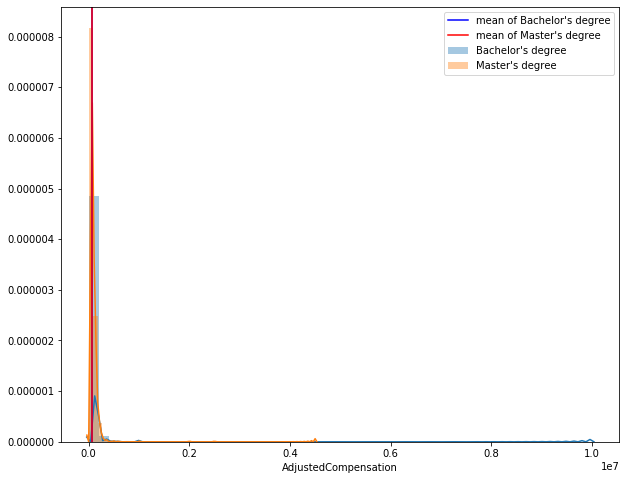

In [119]:
compare_two_degrees(df_1, df_2, degree1, degree2)

In [120]:
def outliers_zscore(data, z=2):
    """
    inputs a data series and outputs boolean list of outliers
    ---------------------------------------------------------
    data = data series
    z=2 cut off z-score
    """
    outliers = abs(stats.zscore(data)) > z
    return outliers

In [121]:
df_1_cleaned = df_1[~outliers_zscore(df_1)]
df_2_cleaned = df_2[~outliers_zscore(df_2)]

Bachelor's degree  Analysis
--------------------------
mean: 54193.85731887953
median: 38345.775
sd: 57217.26653655208
size: 1104
min: 0.0
max: 550000.0

Master's degree  Analysis
------------------------
mean: 63123.543506913134
median: 53248.452000000005
sd: 52624.16943317737
size: 1980
min: 0.0
max: 300000.0

Welch's t-test p-value: 1.0073288296830185e-05


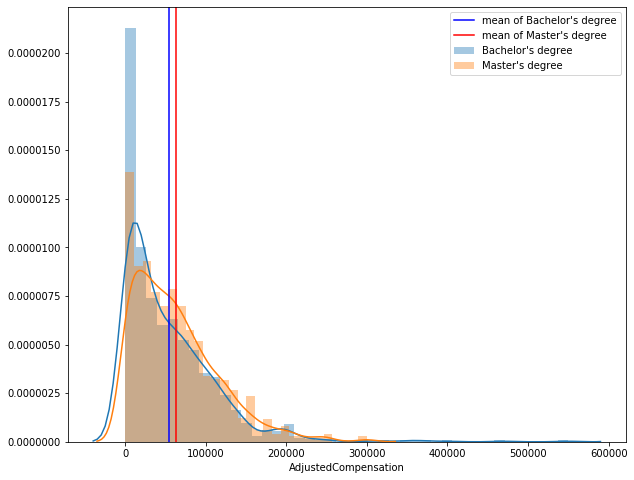

In [122]:
compare_two_degrees(df_1_cleaned, df_2_cleaned, degree1, degree2)

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [123]:
describe_data(df_3,degree3)

Doctoral degree  Analysis
------------------------
mean: 29566175.762453098
median: 74131.91999999997
sd: 909527434.2130314
size: 967
min: -73.516311
max: 28297400000.0


Bachelor's degree  Analysis
--------------------------
mean: 64887.097994618794
median: 38399.4
sd: 306797.2069766149
size: 1107
min: 0.0
max: 9999999.0

Doctoral degree  Analysis
------------------------
mean: 29566175.762453098
median: 74131.91999999997
sd: 909527434.2130314
size: 967
min: -73.516311
max: 28297400000.0

Welch's t-test p-value: 0.15682381994720251


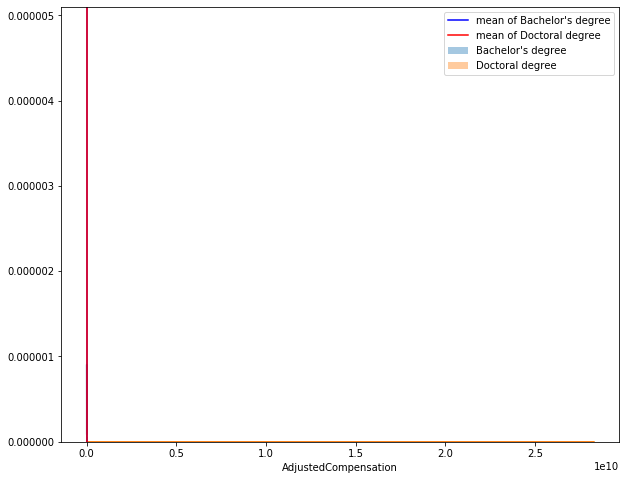

In [124]:
compare_two_degrees(df_1, df_3, degree1, degree3)

In [129]:
df_3_cleaned = df_3[df_3<500000]

Bachelor's degree  Analysis
--------------------------
mean: 54193.85731887953
median: 38345.775
sd: 57217.26653655208
size: 1104
min: 0.0
max: 550000.0

Doctoral degree  Analysis
------------------------
mean: 86194.98163085165
median: 73152.77
sd: 65265.01576411357
size: 964
min: -73.516311
max: 400000.0

Welch's t-test p-value: 0.0


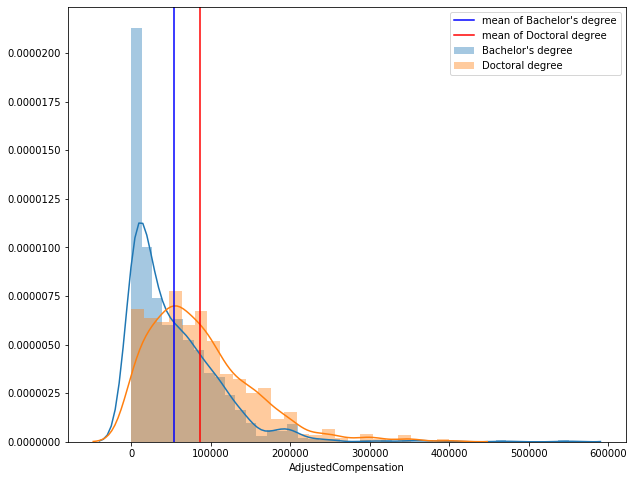

In [130]:
compare_two_degrees(df_1_cleaned, df_3_cleaned, degree1, degree3)

In [11]:
#Your code here

Median Values: 
s1:74131.92 
s2:38399.4
Sample sizes: 
s1: 967 
s2: 1107
Welch's t-test p-value: 0.1568238199472023


Repeated Test with Ouliers Removed:
Sample sizes: 
s1: 964 
s2: 1103
Welch's t-test p-value with outliers removed: 0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [132]:
#Perform ANOVA here
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = '{} ~ C({})'.format(col2, col1)
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [136]:
df_cleaned = df[df[col2]<5*10**5]
formula = f'{col2}~C({col1})'
lm = ols(formula, df_cleaned).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.860266e+11     6.0  29.701947  4.496916e-35
Residual            1.420249e+13  4319.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!